# California Socioeconomic Relations Dataset
#### Luke Kearney, Tiger Cross, Joon-Ho Son, Theo Cohen, Jonas Scholz

***

- [1. Introduction](#intro)
    - [1.1 Dataset Background](#background)
    - [1.2 Project Structure](#structure)
- [2. Data Preparation](#data-preparation)
    - [2.1 Overview of Features](#data-features)
    - [2.2 Incomplete Data](#data-incomplete)
- [3. Feature Selection](#feature-selection)    
- [4. Exploratory data analysis](#data-analysis)
- [5. Case Study](#case-study)
- [6. Classification](#classification)
- [7. Summary](#summary)


TODO: TALK ABOUT MARGIN OF ERROR SOMEWHERE

***
## 1. Introduction<a class="anchor" id="intro"></a>
### 1.1 Dataset Background<a class="anchor" id="background"></a>


The given dataset consists of geodatabase data that combines data from the 2012-2016 American Community Survey (ACS) 5-year estimates and Topologically Integrated Geographic Encoding and Referencing (TIGER) Shapefiles. It can be found at https://www.census.gov/programs-surveys/acs/.

The ACS carry out this supplemental survey every year. More information about these surveys can be found at https://www.census.gov/programs-surveys/acs/. The 5-year estimates that comprises this data is an aggregation of 60 months of ACS data.

We began the task by getting a high level overview of the features. This notebook will explore various correlations discovered during analysis of the provided dataset, and in particular will have a focus on investigating factors affecting **educational attainment**. 

### 1.2 Project Structure<a class="anchor" id="structure"></a>

```Python
data/
data/raw/ # Raw data
data/interim/ # Interim data
data/processed/ # Processed data
imgs/ # Saved images
notebooks/
README.md
src/
```

***
## 2. Data Preparation<a class="anchor" id="data-processing"></a>
### 2.1 Overview of Features<a class="anchor" id="data-overview"></a>

We used pandas and dictionaries available in python to map the long column names for each csv into a more readable table so we could identify the different column names for each table that we could try and find a correlation between: 

In [11]:
# Standard python packages
import os
import sys
from pathlib import Path # For portable paths

# Other package imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [12]:
data_folder = Path("../data/")
raw_data_folder = data_folder / "raw" / "train"

metadata = pd.read_csv(raw_data_folder / "BG_METADATA_2016.csv")

In [13]:
def replace_columns(df):
    """
    Replace the 'short name' of each column of a given data frame with the 'long name' in the metadata file  
    
    Args:
        df: The dataframe to reformat headings on.
        
    Returns:
        The dataframe with reformatted headings.
    """
    labels = pd.Series(metadata["Full_Name"].values,index=metadata["Short_Name"]).to_dict()
    df = df.rename(columns=labels)
    return df

In [14]:
dfs = {}

for f in os.listdir(str(raw_data_folder)):
    print("Reformatted columns names of {}".format(f))
    df = pd.read_csv(raw_data_folder / f)
    df = replace_columns(df)
    dfs[f] = df

Reformatted columns names of BG_METADATA_2016.csv
Reformatted columns names of X00_COUNTS.csv
Reformatted columns names of X01_AGE_AND_SEX.csv
Reformatted columns names of X02_RACE.csv
Reformatted columns names of X03_HISPANIC_OR_LATINO_ORIGIN.csv
Reformatted columns names of X07_MIGRATION.csv
Reformatted columns names of X08_COMMUTING.csv
Reformatted columns names of X09_CHILDREN_HOUSEHOLD_RELATIONSHIP.csv
Reformatted columns names of X11_HOUSEHOLD_FAMILY_SUBFAMILIES.csv
Reformatted columns names of X12_MARITAL_STATUS_AND_HISTORY.csv
Reformatted columns names of X14_SCHOOL_ENROLLMENT.csv
Reformatted columns names of X15_EDUCATIONAL_ATTAINMENT.csv
Reformatted columns names of X16_LANGUAGE_SPOKEN_AT_HOME.csv
Reformatted columns names of X17_POVERTY.csv
Reformatted columns names of X19_INCOME.csv
Reformatted columns names of X20_EARNINGS.csv
Reformatted columns names of X21_VETERAN_STATUS.csv
Reformatted columns names of X22_FOOD_STAMPS.csv
Reformatted columns names of X23_EMPLOYMENT_STA

We identified our overall response variable `y` as The *population over the age of 25 that have attained a bachelors degree or higher*, This is from the following table:

In [15]:
dfs['X15_EDUCATIONAL_ATTAINMENT.csv']

,Unnamed: 0,GEOID,SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Total: Population 25 years and over -- (Estimate),SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Total: Population 25 years and over -- (Margin of Error),SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Male: Population 25 years and over -- (Estimate),SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Male: Population 25 years and over -- (Margin of Error),SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Male: No schooling completed: Population 25 years and over -- (Estimate),SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Male: No schooling completed: Population 25 years and over -- (Margin of Error),SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Male: Nursery to 4th grade: Population 25 years and over -- (Estimate),SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Male: Nursery to 4th grade: Population 25 years and over -- (Margin of Error),...,FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Science and Engineering: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Margin of Error),FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Science and Engineering Related Fields: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Estimate),FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Science and Engineering Related Fields: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Margin of Error),FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Business: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Estimate),FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Business: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Margin of Error),FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Education: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Estimate),FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Education: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Margin of Error),"FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Arts, Humanities and Other: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Estimate)","FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Arts, Humanities and Other: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Margin of Error)",OBJECTID
0,0,15000US060014001001,2478,125,1274,109,0,12,9,13,...,24,0,12,0,12,0,12,0,12,3
1,1,15000US060014002001,843,79,427,54,0,12,0,12,...,22,7,11,6,9,0,12,26,22,4
2,2,15000US060014002002,716,82,313,52,0,12,0,12,...,16,0,12,0,12,0,12,13,19,5
3,3,15000US060014003001,973,329,501,189,0,12,0,12,...,21,0,12,0,12,0,12,13,25,6
4,4,15000US060014003002,1117,225,559,151,14,22,0,12,...,57,0,12,0,12,0,12,20,32,7
5,5,15000US060014003003,819,242,359,129,0,12,0,12,...,12,0,12,0,12,0,12,17,29,8
6,6,15000US060014003004,1215,230,434,109,0,12,0,12,...,12,0,12,0,12,0,12,11,23,9
7,7,15000US060014004001,1175,162,457,83,0,12,0,12,...,35,0,12,0,12,0,12,44,49,10
8,8,15000US060014004002,941,149,455,114,22,26,0,12,...,11,12,18,0,12,0,12,20,23,11
9,9,15000US060014004003,1187,197,590,179,0,12,0,12,...,25,8,13,0,12,0,12,0,12,12


## 2.2 Incomplete Data

The first step in preparing any dataset for use is to deal with missing values. We can gain an overall impression of the quanitity of incomplete data by calculating the percentage of rows/columns that contains a missing value.

In [16]:
def percent_na(df):
    """
    Prints percentage of rows and columns that contain a NaN value for a given dataframe 
    
    Args:
        df: The dataframe to calculate percentages for.
        
    Returns:
        A tuple of the percentage of rows and columns that contain a NaN value.
    """
    # Find rows and columns that contain a NaN value
    narows = df[df.isnull().any(axis=1)]
    nacols = df.columns[df.isna().any()].tolist()
    # Calculate the percentage of rows and columns that contain a NaN value
    percent_narows = round(len(narows)/df.shape[0]*100, 1)
    percent_nacols = round(len(nacols)/df.shape[1]*100, 1)
    return (percent_narows, percent_nacols)

In [17]:
for (name, df) in dfs.items():
    percent_narows, percent_nacols = percent_na(df)
    print("Percent missing data for {} : rows={}% columns={}%".format(name, percent_narows, percent_nacols))

AttributeError: 'DataFrame' object has no attribute 'isna'

From this, we can see that some tables contain a very large proportion of rows with NaN values. For example, `X19_INCOME.csv` has 100% of its rows containing a NaN value.

After cheecking the percentage of missing data in rows and columns for each of the CSVs, we decided to drop the columns that had 20% or greater NaN values, as these were deemed too incomplete to be of significant use.

In [ ]:
dfs_no_na = {}
for (name, df) in dfs.items():
    threshold=len(df)*0.8 # Keep columns with at least 80% data
    dfs_no_na[name] = df.dropna(thresh=threshold, axis=1) 
    print("{} columns dropped : {}".format(name, dfs[name].shape[1] - dfs_no_na[name].shape[1]))
    
del dfs # Free up some memory for my poor laptop

For the remaining incomplete data, our approach involved a basic imputation technique, filling each NaN with the mean value of that column. This method has clear disadvantages (in particular, decreasing the variance of the data), but in the interests of time we deemed this to be the most appropriate solution.

In [ ]:
for (name, df) in dfs_no_na.items():
    dfs_no_na[name] = df.fillna(df.mean())

We perform a quick sanity check to ensure there are no more NaN values in the datasets and save the processed data.

In [ ]:
for (name, df) in dfs_no_na.items():
    percent_narows, percent_nacols = percent_na(df)
    print("Percent missing data for {} : rows={}% columns={}%".format(name, percent_narows, percent_nacols))

for (name, df) in dfs_no_na.items():
    df.to_csv(data_folder / "processed" / name)
    print(f"Saved {name}")

## 3. Feature Selection<a class="anchor" id="feature-selection"></a>

When calculating the correlation between any of our features, we decided to use the Pearson correlation coefficient as we looked into using both the kendall tau and spearmans correlation methods, but did not want to relate ordinal data or data that follows a monotonic function. As part of our feature selection process, we Initially looked at the correlations within individual CSVs to see which features had a similar correlation to each other so we could drop one of those as they would follow the same pattern with our response variable and pollute our results.

In [ ]:
processed_data_folder = Path("../data/processed/")

In [ ]:
## WHAT THE FUCK IS WRONG HERE
def plot_corr_matrices(data_path):
    fig, axarr = plt.subplots(7,3, figsize=(15, 15))
    fig.tight_layout()
    
    ## Takes a loooong time to run
    for i, f in enumerate(os.listdir(str(data_path))):
        df = pd.read_csv(data_path / f)
        row = i // 3
        col = i % 3
        ax = axarr[row, col]
        ax.matshow(df.corr())
        ax.set_title(f, fontsize=8, pad=25)
        ax.set_aspect('equal')
        plt.subplots_adjust(wspace=0.8, hspace=0.5)
        
    plt.show()

plot_corr_matrices(processed_data_folder)

We then iterated through the correlation matrices and dropped features of similar correlation (similar colours in above heatmaps), This narrowed our dataset down a great deal and allowed us to focus more on the correlation of multiple features easier. We considered that it may have made our data more generic, although, we still considered more detailed features as shown when we train our model and in the case study

## 4. Exploratory Data Analysis<a class="anchor" id="data-analysis"></a>

After narrowing our feature set down, we decided to explore all of the different CSVs and observe which remaining features has the greatest correlation with our chosen y value. This was done with the following code, which shows an example of the top correlations within the poverty csv file.

In [ ]:
def find_educational_attainment_correlation(characteristic_csv_filepath, edu_attainment_csv_filepath, truncation_index = False, education_standard = 'bachelors'):
    '''
    education_standard = 'bachelors' or 'masters' or 'higher_education'
    '''

    edu_attainment = pd.read_csv(edu_attainment_csv_filepath)
    characteristic = pd.read_csv(characteristic_csv_filepath)

    no_bachelors = edu_attainment["EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Bachelor's degree: Population 25 years and over -- (Estimate)"]
    no_masters = edu_attainment["EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Master's degree: Population 25 years and over -- (Estimate)"]
    no_higher_ed = no_masters + no_bachelors

    edu_population = edu_attainment[edu_attainment.columns[3]]
    char_population = characteristic[characteristic.columns[3]]

    if truncation_index == False:
        truncation_index = len(no_masters)

    fractional_bachelors = no_bachelors/edu_population
    fractional_masters = no_masters/edu_population

    if education_standard == 'bachelors':
        y = no_bachelors[0:truncation_index]
    if education_standard == 'masters':
        y = no_masters[0:truncation_index]
    else:
        y = no_higher_ed[0:truncation_index]

    correlations = []
    column_name = []


    for column in characteristic.columns[4:]:
        absolute_x = characteristic[column][0:truncation_index]
        fractional_x = absolute_x/char_population[0:truncation_index]
        correlations.append(np.corrcoef(absolute_x, y)[0][1])
        column_name.append(characteristic[column].name)

    df = pd.DataFrame(correlations, column_name, columns = ['correlation'])
    '''
    returns max correlating factor, all correlations,
    '''

    return df.sort_values('correlation', ascending = False)

In [ ]:
poverty_file = processed_data_folder / "X17_POVERTY.csv"
education_file = processed_data_folder / "X15_EDUCATIONAL_ATTAINMENT.csv"
correlations_df = find_educational_attainment_correlation(str(poverty_file), str(education_file), truncation_index=False, education_standard='higher_education')

In [ ]:
plt.barh(correlations_df.index[:10], correlations_df["correlation"].values[:10])
plt.show()

In the code below, we exploit this and narrow our feature set even further, plotting the top 3 correlations for a strong positive correlation, strong negative correlations, and weak correlations

In [18]:
filenames = ['X01_AGE_AND_SEX', 'X02_RACE', 'X03_HISPANIC_OR_LATINO_ORIGIN',
             'X07_MIGRATION', 'X08_COMMUTING', 'X09_CHILDREN_HOUSEHOLD_RELATIONSHIP',
             'X11_HOUSEHOLD_FAMILY_SUBFAMILIES', 'X12_MARITAL_STATUS_AND_HISTORY',
             'X14_SCHOOL_ENROLLMENT', 'X16_LANGUAGE_SPOKEN_AT_HOME', 'X19_INCOME', 'X20_EARNINGS',
             'X21_VETERAN_STATUS', 'X22_FOOD_STAMPS', 'X23_EMPLOYMENT_STATUS',
             'X27_HEALTH_INSURANCE', 'X99_IMPUTATION']

data_correlations_path = Path("../data/interim/correlations")

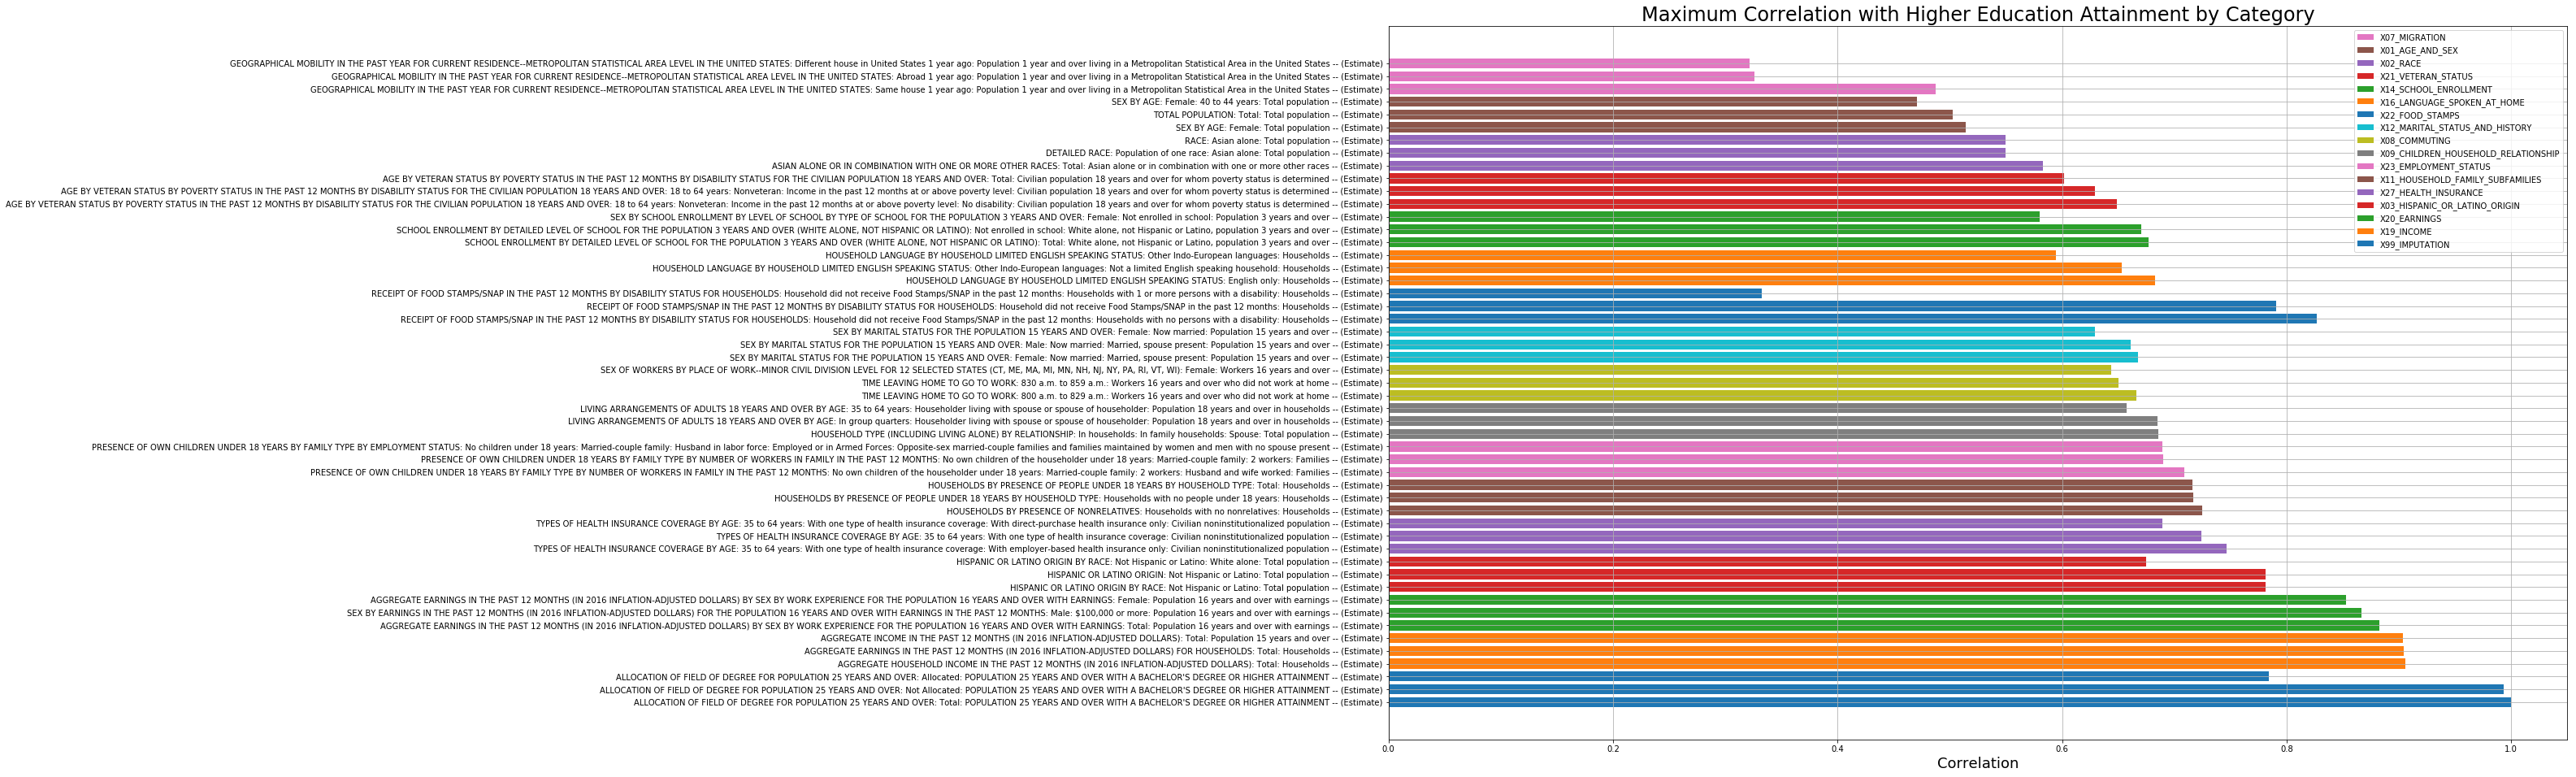

In [26]:
dfs = []

plots_per_df = 3

for name in filenames:
    df = pd.read_csv(data_correlations_path / "{}_correlation.csv".format(name))
    df['origin_file'] = name
    dfs.append(df)

top_correlations    = [] # The strongest positive correlations
min_correlations    = [] # The weakest correlations
bottom_correlations = [] # The strongest negative correlations

for df in dfs:
    # We are only interested in Estimates, not the Margin of Error.
    df = df[df['Unnamed: 0'].str.contains('Estimate')] 
    top_correlations.append(df[0:plots_per_df])
    bottom_correlations.append(df[-3:])
    min_correlations.append(df.sort_values('abs_correlation', ascending = False)[-3:])

# Chart labels
top_labels    = []
bottom_labels = []
min_labels    = []

# Chart graphs
top_values    = []
bottom_values = []
min_values    = []

# Origin File Names
top_files     = []
bottom_files  = []
min_files     = []

for df in top_correlations:
    top_labels.append(df['Unnamed: 0'].tolist())
    top_values.append(df['correlation'].tolist())
    top_files.append(df['origin_file'].tolist())

for df in bottom_correlations:
    bottom_labels.append(df['Unnamed: 0'].tolist())
    bottom_values.append(df['correlation'].tolist())
    bottom_files.append(df['origin_file'].tolist())

for df in min_correlations:
    min_labels.append(df['Unnamed: 0'].tolist())
    min_values.append(df['correlation'].tolist())
    min_files.append(df['origin_file'].tolist())

sorting_df = pd.DataFrame([top_values, top_labels, top_files], index=['top_values', 'top_labels', 'top_files']).transpose()

means = []

for i in range(len(sorting_df['top_values'])):
    means.append(np.mean(sorting_df['top_values'][i]))

sorting_df['average_value'] = means
sorted_top_values_df = sorting_df.sort_values('average_value', ascending = False)

bottom_sorting_df = pd.DataFrame([bottom_values, bottom_labels, bottom_files], index=['bottom_values', 'bottom_labels', 'bottom_files']).transpose()

bottom_means = []
for i in range(len(bottom_sorting_df['bottom_values'])):
    bottom_means.append(np.mean(bottom_sorting_df['bottom_values'][i]))

bottom_sorting_df['average_value'] = bottom_means
sorted_bottom_values_df = bottom_sorting_df.sort_values('average_value', ascending = False)

min_sorting_df = pd.DataFrame([min_values, min_labels, min_files], index=['min_values', 'min_labels', 'min_files']).transpose()

min_means = []
for i in range(len(min_sorting_df['min_values'])):
    abs_min_sorting_df = list(map(abs, min_sorting_df['min_values'][i]))
    min_means.append(np.mean(abs_min_sorting_df))

min_sorting_df['average_value'] = min_means

sorted_min_values_df = min_sorting_df.sort_values('average_value', ascending = False)

sorted_bottom_values = []
sorted_bottom_labels = []
sorted_bottom_files  = [] 
sorted_min_values    = []
sorted_min_labels    = []
sorted_min_files     = []
sorted_top_values    = []
sorted_top_labels    = []
sorted_top_files     = []

for values in sorted_top_values_df['top_values']:
    for value in values:
        sorted_top_values.append(value)

for values in sorted_bottom_values_df['bottom_values']:
    for value in values:
        sorted_bottom_values.append(value)

for values in sorted_min_values_df['min_values']:
    for value in values:
        sorted_min_values.append(value)
        
        
for files in sorted_top_values_df['top_files']:
    for file in files:
        sorted_top_files.append(file)

for files in sorted_bottom_values_df['bottom_files']:
    for file in files:
        sorted_bottom_files.append(file)

for files in sorted_min_values_df['min_files']:
    for file in files:
        sorted_min_files.append(file)
        
        

for labels in sorted_top_values_df['top_labels']:
    for label in labels:
        sorted_top_labels.append(label)

for labels in sorted_bottom_values_df['bottom_labels']:
    for label in labels:
        sorted_bottom_labels.append(label)

for labels in sorted_min_values_df['min_labels']:
    for label in labels:
        sorted_min_labels.append(label)

x = np.linspace(0, 51, 51)
top_corr = plt.figure(figsize=(26, 26/1.61))
subplot_top_corr = top_corr.add_subplot(1, 1, 1)

for i in range(len(sorted_top_values))[0::3]:
    subplot_top_corr.barh(x[i:i+3], sorted_top_values[i:i+3], label = sorted_top_files[i])

handles, labels = subplot_top_corr.get_legend_handles_labels()
subplot_top_corr.legend(handles[::-1], labels[::-1])

plt.title("Maximum Correlation with Higher Education Attainment by Category", fontsize = 24)
plt.xlabel("Correlation", fontsize = 18)
plt.grid()
plt.yticks(x, sorted_top_labels)
plt.show()

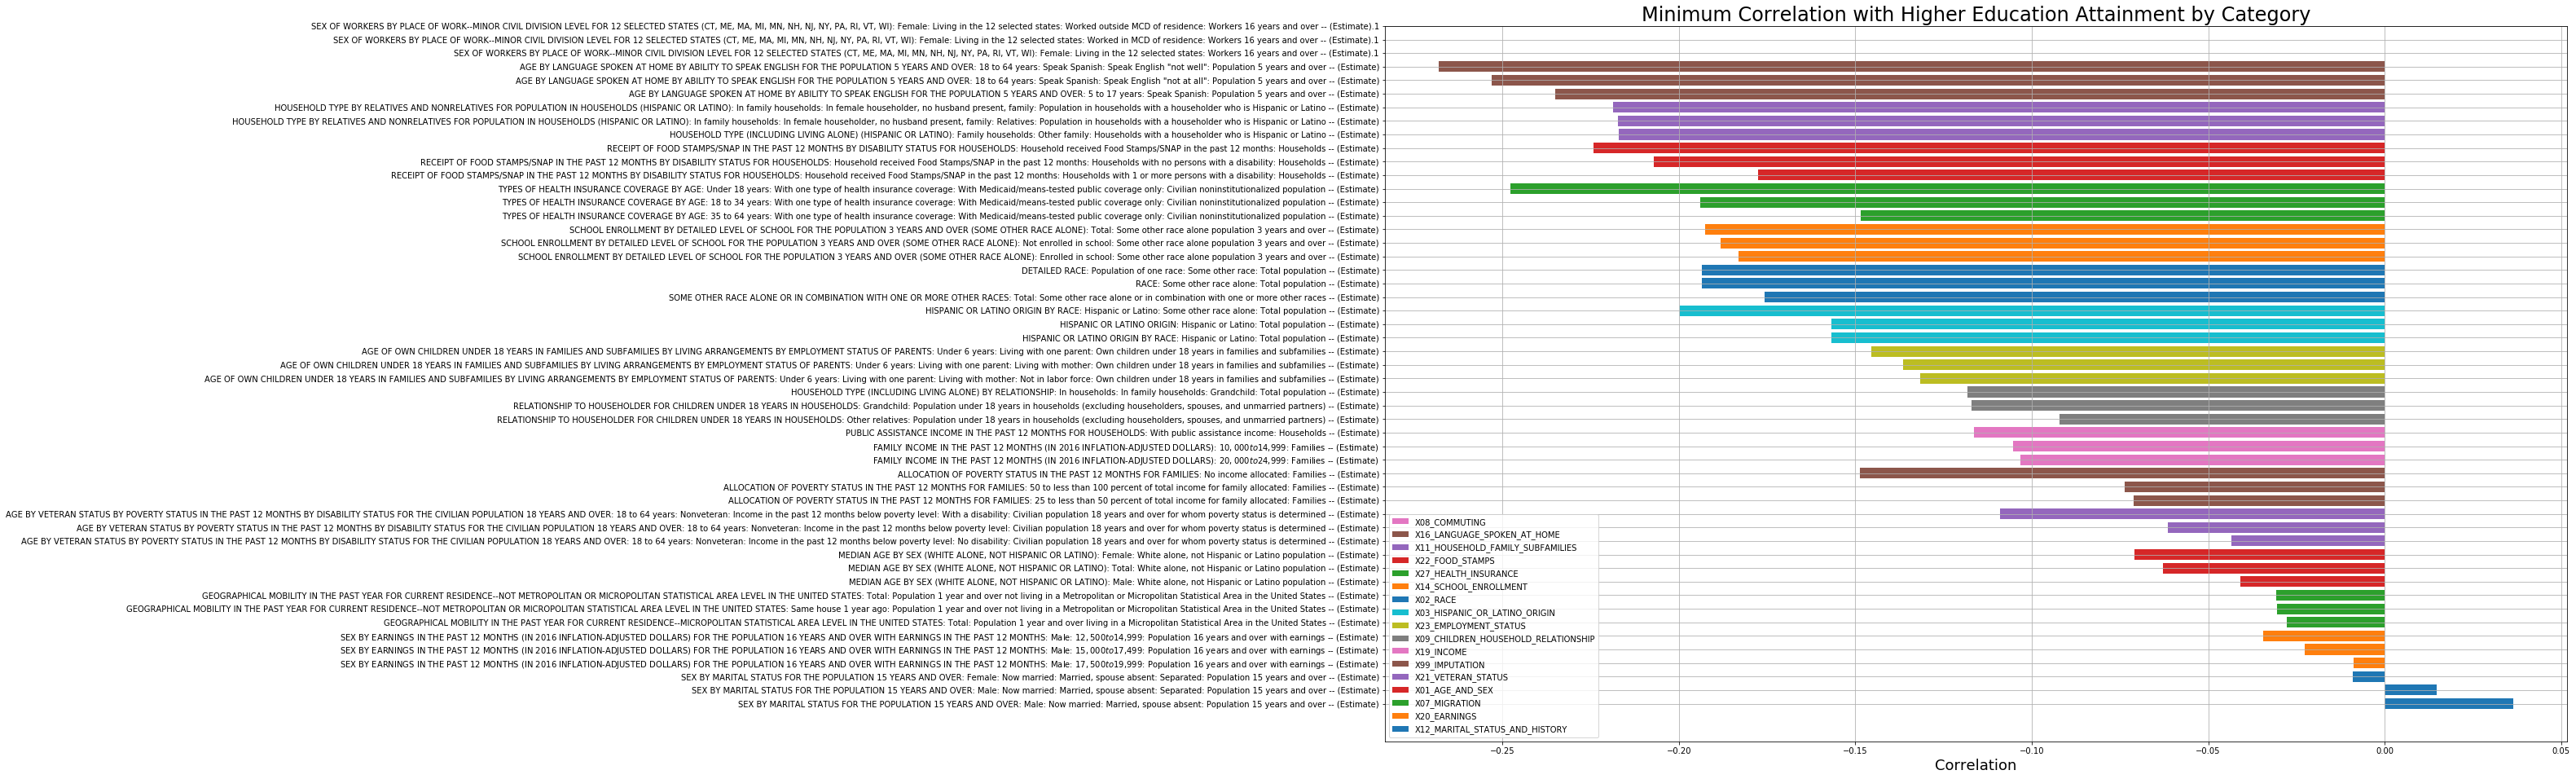

In [27]:
bottom_corr = plt.figure(figsize=(26, 26/1.61))
subplot_bottom_corr = bottom_corr.add_subplot(1, 1, 1)

for i in range(len(sorted_bottom_values))[0::3]:
    subplot_bottom_corr.barh(x[i:i+3], sorted_bottom_values[i:i+3], label = sorted_bottom_files[i])

handles, labels = subplot_bottom_corr.get_legend_handles_labels()
subplot_bottom_corr.legend(handles[::-1], labels[::-1])

plt.title("Minimum Correlation with Higher Education Attainment by Category", fontsize = 24)
plt.xlabel("Correlation", fontsize = 18)
plt.grid()
plt.yticks(x, sorted_bottom_labels)
plt.show()

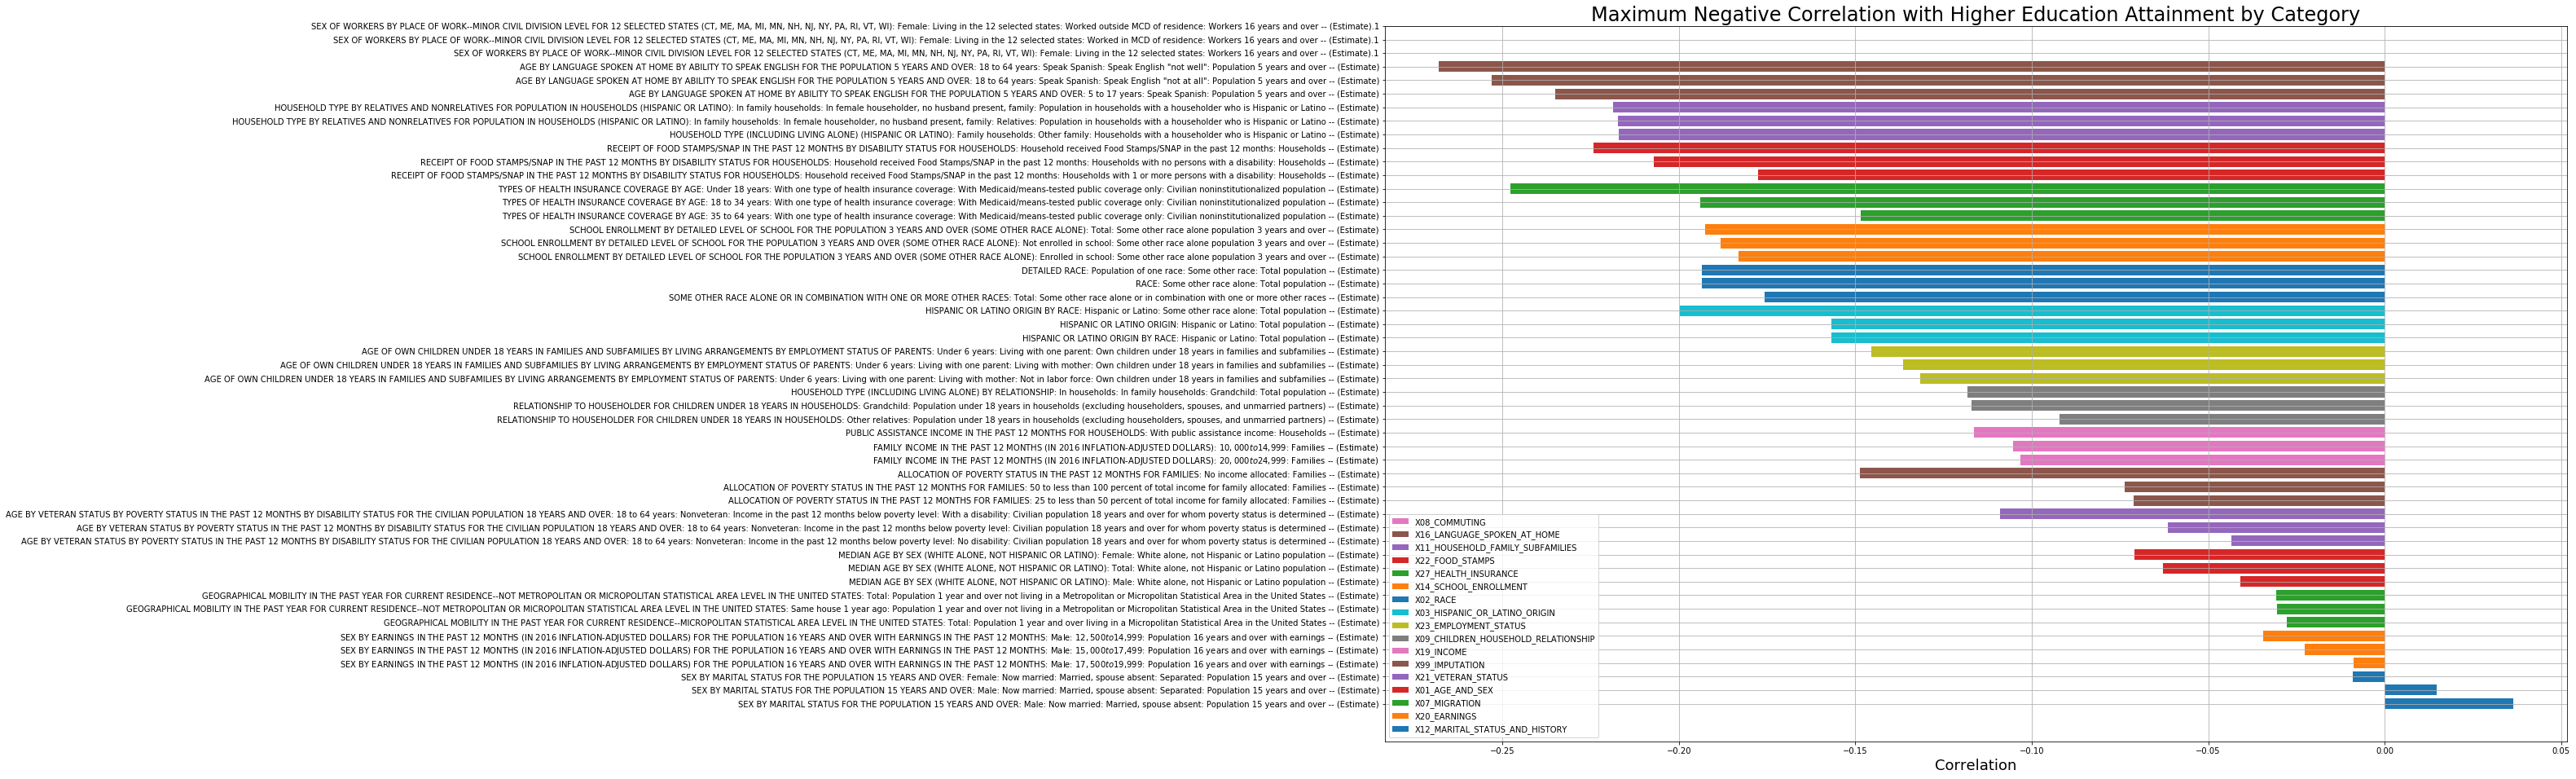

In [28]:
bottom_corr = plt.figure(figsize=(26, 26/1.61))
subplot_bottom_corr = bottom_corr.add_subplot(1, 1, 1)

for i in range(len(sorted_bottom_values))[0::3]:
    subplot_bottom_corr.barh(x[i:i+3], sorted_bottom_values[i:i+3], label = sorted_bottom_files[i])

handles, labels = subplot_bottom_corr.get_legend_handles_labels()
subplot_bottom_corr.legend(handles[::-1], labels[::-1])

plt.title("Maximum Negative Correlation with Higher Education Attainment by Category", fontsize = 24)
plt.xlabel("Correlation", fontsize = 18)
plt.grid()
plt.yticks(x, sorted_bottom_labels)
plt.show()

## Case Study: How the educational attainment has been correlated to gender over time<a class="anchor" id="case-study"></a>

For this case study, we have studied that percentage of the population who graduated from a bachelor degree or higher given their gender and their age. Therefore, we can evaluate the evolution of educational attainment over time for each gender. Note that the database only provides information for 3 age frames which are 25 to 39, 40 to 64 and 65 and over. Hence, we are missing the generation currently attending univeristy (18 to 24 years old). We have looked at the school enrollment csv file which do provides the amount of attendance to universities for males and females but we decided to not trust this data as it has an average margin of error higher than 80%. Therefore, we couldn't complete the evolution up to the present time.

In [ ]:
edu_attainment_csv_filepath = processed_data_folder / "X15_EDUCATIONAL_ATTAINMENT.csv"
sex_csv_filepath = processed_data_folder / "X01_AGE_AND_SEX.csv"

edu_attainment = pd.read_csv(str(edu_attainment_csv_filepath))
sex_data = pd.read_csv(str(sex_csv_filepath))

women_25_39 = edu_attainment["SEX BY AGE BY FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR FOR THE POPULATION 25 YEARS AND OVER: Female: 25 to 39 years: POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Estimate)"]
women_40_64 = edu_attainment["SEX BY AGE BY FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR FOR THE POPULATION 25 YEARS AND OVER: Female: 40 to 64 years: POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Estimate)"]
women_65_over = edu_attainment["SEX BY AGE BY FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR FOR THE POPULATION 25 YEARS AND OVER: Female: 65 years and over: POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Estimate)"]

women_total = sex_data["SEX BY AGE: Female: Total population -- (Estimate)"]
women_total_18_24 = sex_data["SEX BY AGE: Female: 18 and 19 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Female: 20 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Female: 21 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Female: 22 to 24 years: Total population -- (Estimate)"]
women_total_25_39 = sex_data["SEX BY AGE: Female: 25 to 29 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Female: 30 to 34 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Female: 35 to 39 years: Total population -- (Estimate)"]
women_total_40_64 = sex_data["SEX BY AGE: Female: 40 to 44 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Female: 45 to 49 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Female: 50 to 54 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Female: 55 to 59 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Female: 60 and 61 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Female: 62 to 64 years: Total population -- (Estimate)"]
women_total_65_over = sex_data["SEX BY AGE: Female: 65 and 66 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Female: 67 to 69 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Female: 70 to 74 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Female: 75 to 79 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Female: 80 to 84 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Female: 85 years and over: Total population -- (Estimate)"]

women_25_39_ratio = sum(women_25_39) / sum(women_total_25_39) * 100
women_total_40_64_ratio = sum(women_40_64) / sum(women_total_40_64) * 100
women_total_65_over_ratio = sum(women_65_over) / sum(women_total_65_over) * 100

y_women = [women_total_65_over_ratio, women_total_40_64_ratio, women_25_39_ratio]

########

men_25_39 = edu_attainment["SEX BY AGE BY FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR FOR THE POPULATION 25 YEARS AND OVER: Male: 25 to 39 years: POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Estimate)"]
men_40_64 = edu_attainment["SEX BY AGE BY FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR FOR THE POPULATION 25 YEARS AND OVER: Male: 40 to 64 years: POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Estimate)"]
men_65_over = edu_attainment["SEX BY AGE BY FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR FOR THE POPULATION 25 YEARS AND OVER: Male: 65 years and over: POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Estimate)"]

men_total = sex_data["SEX BY AGE: Male: Total population -- (Estimate)"]
men_total_18_24 = sex_data["SEX BY AGE: Male: 18 and 19 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Male: 20 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Male: 21 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Male: 22 to 24 years: Total population -- (Estimate)"]
men_total_25_39 = sex_data["SEX BY AGE: Male: 25 to 29 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Male: 30 to 34 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Male: 35 to 39 years: Total population -- (Estimate)"]
men_total_40_64 = sex_data["SEX BY AGE: Male: 40 to 44 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Male: 45 to 49 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Male: 50 to 54 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Male: 55 to 59 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Male: 60 and 61 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Male: 62 to 64 years: Total population -- (Estimate)"]
men_total_65_over = sex_data["SEX BY AGE: Male: 65 and 66 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Male: 67 to 69 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Male: 70 to 74 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Male: 75 to 79 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Male: 80 to 84 years: Total population -- (Estimate)"]+ sex_data["SEX BY AGE: Male: 85 years and over: Total population -- (Estimate)"]

men_25_39_ratio = sum(men_25_39) / sum(men_total_25_39) * 100
men_total_40_64_ratio = sum(men_40_64) / sum(men_total_40_64) * 100
men_total_65_over_ratio = sum(men_65_over) / sum(men_total_65_over) * 100

y_men = [men_total_65_over_ratio, men_total_40_64_ratio, men_25_39_ratio]

########

N = 3
fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, y_men, width, color='dodgerblue')
p2 = ax.bar(ind + width, y_women, width,
            color='r')

ax.set_title('bachelor degree or higher (in %)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(("65-over","40-64" ,"25-39"))

for i in ax.patches:
    ax.text(i.get_x() + 0.05, i.get_height() + 0.5, str(i.get_height()).split(".", 1)[0] + "%", fontsize=11, color='dimgrey')

plt.xlabel('men/women generations (by age)')
ax.legend((p1[0], p2[0]), ('Men', 'Women'), bbox_to_anchor=(1, 1))

plt.show()

Interpretation: We notice that while the general university attendance increased over the past decades, the women attendance particualrly raised. It was about 10% less then men 50 years ago but it built up to be more that men for the generation between 25 and 49 years old, and probably even more for the next generation.

Note that the database only provides information for 3 age frames which are 25 to 39, 40 to 64 and 65 and over. Hence, we are missing the generation currently attending univeristy (18 to 24 years old). We have looked at the school enrollment csv file which do provides the amount of attendance to universities for males and females but we decided to not trust this data as it has an average margin of error higher than 80%. Therefore, we couldn't complete the evolution up to the present time.

## Mapping the Data 

Each individual dataset contains a column for the GEOID and Centroids.csv contains the mapping between each GEOID and lon-lat coordinates.

Centroids was produced using the US Census Block Group Shapefile. Loading this into QGIS software and computing the centroid of each block group polygon with the geometry tools, allowed us to obtain the GEOID-lonlat mapping using the shapefile's corresponding database file.

In [ ]:
filename = '../data/interim/Centroids.csv'
data = np.loadtxt(filename, dtype=str, delimiter=',', usecols=range(10), skiprows=1)
GEOID = data[:,0]
LON = data[:,8].astype(float)
LAT = data[:,9].astype(float)

Loading in COUNTYNODES.csv, a file containing the coordinates of the perimeters of California counties. 

In [ ]:
filename='../data/interim/COUNTYNODES.csv'
data = np.loadtxt(filename, dtype=str, usecols=range(8), skiprows=1, delimiter=',')
COUNTY = data[:,3]
CLON = data[:,6].astype(float)
CLAT = data[:,7].astype(float)

Loading in desired processed data .csv file and column variable, in this case number of Bachelor's degrees (column index 123):

In [ ]:
CSV_file = '../data/processed/X15_EDUCATIONAL_ATTAINMENT.csv'
CSV_VARIABLE = np.loadtxt(CSV_file, dtype=str, delimiter=',', usecols=(123,), skiprows=0)
CSV_VARIABLE_NAME = CSV_VARIABLE[0]
CSV_VARIABLE = CSV_VARIABLE[1:].astype(float)

CSV_GEOID = np.loadtxt(CSV_file, dtype=str, delimiter=',', usecols=(2,), skiprows=1)
CSV_LONLAT = np.zeros((len(CSV_GEOID),2), dtype=float)

Producing a dictionary for the mapping between each GEOID and printing missing values from US Census shapefile that appear in our dataset:

In [ ]:
lonlat = np.transpose([LON, LAT])

# dictionary of mapping:
D = {}
for i in range(len(GEOID)):
    D[GEOID[i]] = lonlat[i]

failed=[] # find index of CSV_GEOID err
for i in range(len(CSV_GEOID)):
    try:
        CSV_LONLAT[i] = D[CSV_GEOID[i]]
    except:
        print('FAILED: {}, INDEX: {}'.format(CSV_GEOID[i], i))
        failed.append(i)
        
# loop backwards
for j in range(len(CSV_LONLAT)-1,-1,-1):
    if j in failed:
        CSV_LONLAT = np.delete(CSV_LONLAT, j, axis=0)
        CSV_VARIABLE = np.delete(CSV_VARIABLE, j, axis=0)
LON = CSV_LONLAT[:,0]
LAT = CSV_LONLAT[:,1]


In [ ]:
D={}
lassenlon=[]
lassenlat=[]
Dlon = {}
Dlat = {}
Dlonlat = {}
Dpoly = {}

countynames = []
for i in COUNTY:
    if i not in countynames:
        countynames.append(i)

for j in countynames:
    countylon=[]
    countylat=[]
    countylonlat=[]
    for i in range(len(COUNTY)):
        if COUNTY[i] == j: # if COUNTY = countyname
            countylon.append(CLON[i])
            countylat.append(CLAT[i])
            countylonlat.append([CLON[i],CLAT[i]])
    Dlon[j] = countylon
    Dlat[j] = countylat

    # TO PLOT COUNTY BORDERS UNCOMMENT
    #plt.plot(countylon, countylat, c='black', linewidth=0.3)

    Dlonlat[j] = countylonlat
    poly = Polygon(countylonlat)
    Dpoly[j] = poly

Calculating average value of variable per county by checking if each point lies within the perimeter then adding to the county variable sum, producing a total average:

In [ ]:
Dvalue = {}
countycnt=0
#print(len(LON), len(CSV_VARIABLE))
# USED TO CALCULATE AVERAGE VALUE OF VARIABLE PER COUNTY:
for i in countynames:
    countyavg=0
    countycnt=0
    for j in range(len(LON)): # looping through all points in 
        if Dpoly[i].contains(Point(LON[j], LAT[j])):
            countyavg += CSV_VARIABLE[j]
            countycnt += 1
    if countycnt != 0:
        countyavg /= countycnt
        # get percentage assuming 1000 per block group:
        countyavg /= 10
    Dvalue[i] = countyavg

Plotting polygons of each county filled using plasma colour scale:

In [ ]:
# PLOT POLYGONS
norm = matplotlib.colors.Normalize(vmin=0, vmax=max(Dvalue.values()))
#fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(7,5))
#ax = fig.add_subplot(111)

fig = plt.figure(figsize=(8,6))
ax1  = fig.add_axes([0.10,0.10,0.70,0.85])

for i in countynames:
    countypoly = Dpoly[i]
    x,y = countypoly.exterior.xy
    cmap = cm.plasma
    color = cmap(norm(Dvalue[i]))

    ax1.fill(x,y, c=color)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.savefig(CSV_VARIABLE_NAME[:30] + ".pdf")

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Percentage of people per Block Group with a Bachelor\'s')
plt.show()

## Summary<a class="anchor" id="summary"></a>